---

### 엑셀 파일 전처리

In [5]:
import pandas as pd

In [3]:
# file list
originFileL = []
for i in range(9):
    fileName = "/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 ("+str(i)+")/SMARTSTORE_1.xls"
    originFileL.append(fileName)
originFileL

['/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (0)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (1)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (2)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (3)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (4)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (5)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (6)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (7)/SMARTSTORE_1.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (8)/SMARTSTORE_1.xls']

In [59]:
for file in originFileL:
    ss = pd.read_excel(file)
    
    # 자동 업로드 안되는 요소 제거
    ss["상품 상세정보"] = [x.replace("IMG align=absMiddle ", "") for x in ss["상품 상세정보"]]
    
    ss.to_excel(file.replace("1.xls", "new.xls"))

---

###  제목 변경

In [1]:
import cv2
import matplotlib.pyplot as plt
plt.rc('font', family='Nanum Gothic')

In [2]:
# file list
newFileL = []
for i in range(9):
    fileName = "/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 ("+str(i)+")/SMARTSTORE_new.xls"
    newFileL.append(fileName)
newFileL

['/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (0)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (1)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (2)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (3)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (4)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (5)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (6)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (7)/SMARTSTORE_new.xls',
 '/Users/user/gitClone/smartstore/20200823/SMARTSTORE_1 (8)/SMARTSTORE_new.xls']

In [60]:
def reTitle(title):
    if(len(title) < 16):
        cutNum = -1
    else:
        cutNum = title[15:].find(" ") + 15
    if(cutNum == -1):
        return title
    return title[:cutNum]+"\n"+title[cutNum+1:]

In [118]:
# 사용할 file, row 범위 
file = newFileL[0]
row = (40, 50)
plt.rcParams["figure.figsize"] = (15,7)

# 초기에 한번만 (아래 MyFile 부분 주석)
# ss = pd.read_excel(file)

imgDir = file.replace("SMARTSTORE_new.xls", "prdimg1/")
myFile = file.replace("_new.xls", "_my.xls")
ss = pd.read_excel(myFile)
ss = ss.drop("Unnamed: 0", axis = 1)

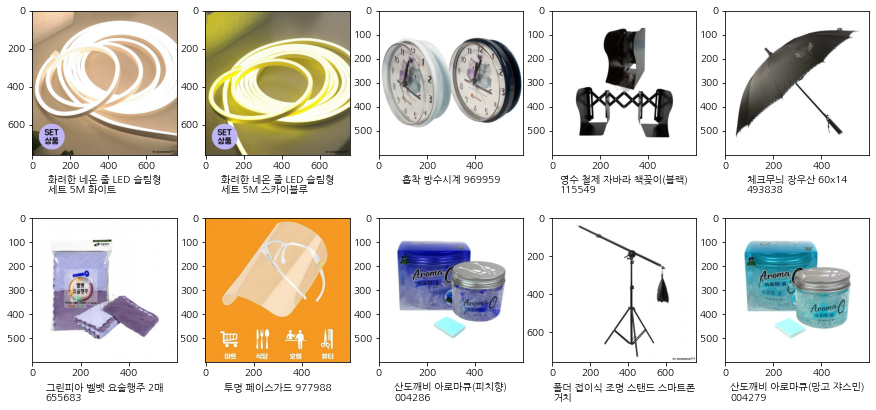

In [119]:
# 이미지 1줄에 5개씩 출력
fig = plt.figure()
plt.tight_layout()
for i in range(row[0], row[1]):
    imgFileName = ss.iloc[i]["대표 이미지 파일명"]
    title = ss.iloc[i]["상품명"]
    img = cv2.imread(imgDir + imgFileName)
    ax1 = fig.add_subplot((row[1]-row[0])//5 , 5, i-row[0]+1)
    ax1.imshow(img)
    ax1.set_xlabel(reTitle(title), multialignment= "left")

In [120]:
# 새 정보 넣기 (판매자 특이사항에 라벨링 m(modified))
newTitle = [
    "LED 네온바 네온플렉스 면발광 간판 자동차 인테리어 DYI 조명호스 슬림형 화이트",
    "LED 네온바 네온플렉스 면발광 간판 자동차 인테리어 DYI 조명호스 슬림형 스카이블루",
    "방수 욕실시계 흡착 벽시계",
    "길이조절 다이나믹 가변 DIY 철재 책꽂이 칸막이 자바라서류 파일 정리 꾸미기",
    "모던 클래식 장우산 튼튼한 예쁜 고급 대형 체크 우산",
    "SNS인기 양면 요술행주 벨벳행주",
    "페이스쉴드 안면 비말 차단 강의용 강사용 선생님 학교 투명 마스크 5개",
    "산도깨비 방향제 공기청향제 아로마큐 피치향",
    "카메라 스마트폰 삼각대 접이식",
    "산도깨비 방향제 공기청향제 아로마큐 망고 쟈스민"
]
ss.iloc[row[0]:row[1]]["상품명"] = newTitle
ss.iloc[row[0]:row[1]]["판매자 특이사항"] = "m"
ss.to_excel(myFile)

<ipython-input-120-e8f902c05c89>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.iloc[row[0]:row[1]]["상품명"] = newTitle
<ipython-input-120-e8f902c05c89>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.iloc[row[0]:row[1]]["판매자 특이사항"] = "m"


In [122]:
# ss[["상품명","판매자 특이사항"]].head(50)